In [1]:
from BLEanalysis.pathinference import Path
from BLEanalysis.kernels import EQIntegralKernel
from BLEanalysis.synthetic import SimpleDemo

2025-04-28 14:33:45.402309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745847225.419134   17671 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745847225.424265   17671 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745847225.436520   17671 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745847225.436536   17671 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745847225.436538   17671 computation_placer.cc:177] computation placer alr

In [2]:
#import numpy as np
#import matplotlib.pyplot as plt
#k = EQIntegralKernelA(tf.Variable(20.0,tf.float32),1.0)
#X = tf.Variable(np.array([[0.0,1,2,3,4,0,1,2,3,4,0,1,2,3,4],[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]]).T)
#X = tf.cast(X,tf.float32)
#plt.imshow(k.K(X,X))

In [4]:
#X = tf.Variable(np.array([[4,8,6],[0,0,0]]).T)
#X = tf.cast(X,tf.float32)
#k = EQIntegralKernel(tf.Variable(20.0,tf.float32),1.0)
#cov = k.K(X,X)
#covxx = np.array([[cov[0,0],cov[0,2]],[cov[2,0],cov[2,2]]])
#covstarx = np.array([cov[1,0],cov[1,2]])
#covstarx @ np.linalg.inv(covxx) @ np.array([[4,9]]).T

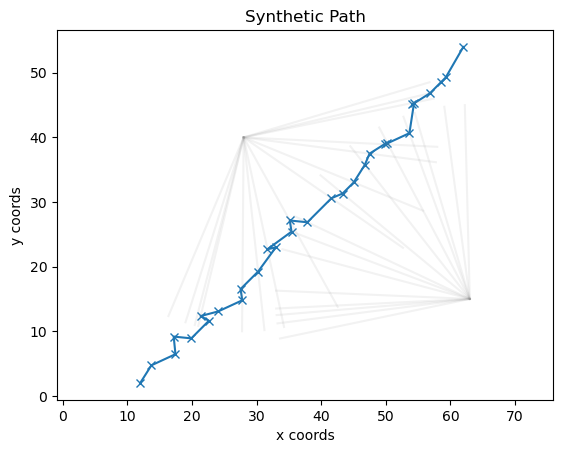

In [5]:
demo = SimpleDemo()
demo.plot()

In [6]:
demo.obstimes

array([0.        , 0.17241379, 0.34482759, 0.51724138, 0.68965517,
       0.86206897, 1.03448276, 1.20689655, 1.37931034, 1.55172414,
       1.72413793, 1.89655172, 2.06896552, 2.24137931, 2.4137931 ,
       2.5862069 , 2.75862069, 2.93103448, 3.10344828, 3.27586207,
       3.44827586, 3.62068966, 3.79310345, 3.96551724, 4.13793103,
       4.31034483, 4.48275862, 4.65517241, 4.82758621, 5.        ])

In [7]:
inferredPath = Path(demo.obstimes+20, demo.observations, kernel = EQIntegralKernel(lengthscale = 3.5,scalefactor = 100.0), 
                    noiseScale=1.0, numberOfInducingPoints=20)
inferredPath.run(400,3.0)


2025-04-28 14:34:11.503651: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


2025-04-28 14:34:20.311790: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


At iteration:      0, loss is:       nan
Increasing jitter to 0.00001


2025-04-28 14:35:09.495696: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


At iteration:      0, loss is:       nan
Increasing jitter to 0.00010


2025-04-28 14:35:59.766665: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


At iteration:      0, loss is:       nan
Increasing jitter to 0.00100


2025-04-28 14:36:51.542840: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


At iteration:      0, loss is:       nan
Increasing jitter to 0.01000
At iteration:      0, loss is:     24818
At iteration:     50, loss is:      1705
At iteration:    100, loss is:       195
At iteration:    150, loss is:       147
At iteration:    200, loss is:       136
At iteration:    250, loss is:       128
At iteration:    300, loss is:       125
At iteration:    350, loss is:       131
Training successful!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from BLEanalysis import confidence_ellipse
mu = []
cov = []
for a in np.linspace(16,29,20):
    
    thismu, thiscov = inferredPath.predict(Xs=tf.Variable(np.array([[a,0],[a,1],[a,2]]),dtype=tf.float32))
    mu.append(thismu)
    cov.append(thiscov)
    #print(a,mu)
mu = np.array(mu)
cov=np.array(cov)


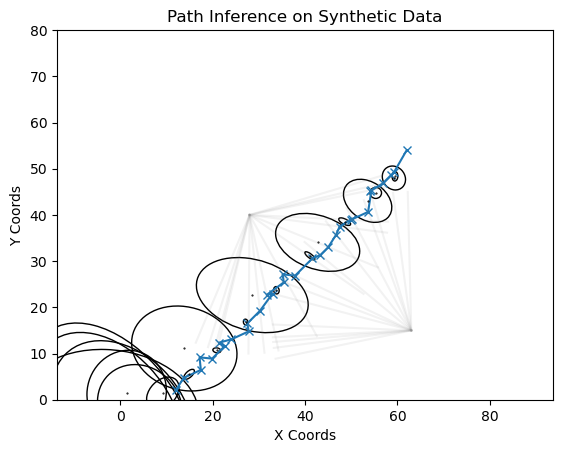

In [12]:

demo.plot()
ax = plt.gca()

#for i,(m,c) in enumerate(zip(mu.numpy(),cov.numpy())):
for i,(m,c) in enumerate(zip(mu[:,0,:],cov[:,0,:,:])):
    std = max(np.sqrt(c[0,0]),np.sqrt(c[1,1]))
    ax.plot(m[0],m[1],'.k',markersize=1)    
    el = confidence_ellipse(m[:2],c[:2,:2],ax,n_std=1)
    ax.add_patch(el)
plt.xlabel("X Coords")
plt.ylabel("Y Coords")
plt.xlim([0,80])
plt.ylim([0,80])
plt.title("Path Inference on Synthetic Data")
plt.show()

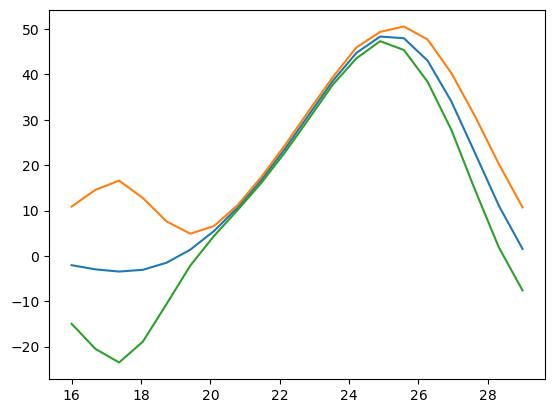

In [14]:
times = np.linspace(16,29,20)
plt.plot(times,mu[:,0,1])
plt.plot(times,mu[:,0,1]+np.sqrt(cov[:,0,1,1]))
plt.plot(times,mu[:,0,1]-np.sqrt(cov[:,0,1,1]))

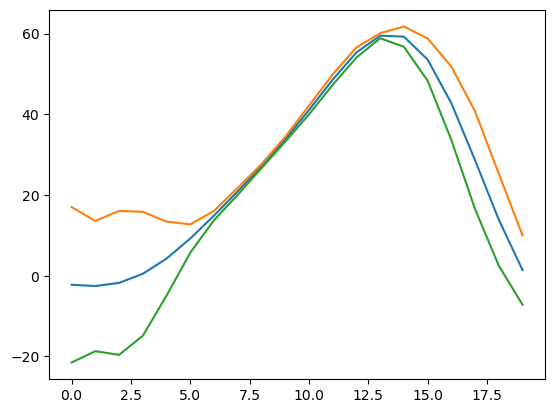

In [15]:
plt.plot(mu[:,0,0])
plt.plot(mu[:,0,0]+np.sqrt(cov[:,0,0,0]))
plt.plot(mu[:,0,0]-np.sqrt(cov[:,0,0,0]))

In [15]:
cov.shape

(20, 1, 3, 3)

In [85]:
mu, cov = inferredPath.predict(Xs=inferredPath.selectPoints(2,margin=1))

In [88]:
tf.Variable(np.array([[a,0],[a,1],[a,2]]),dtype=tf.float32)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[3.7931035, 0.       ],
       [3.7931035, 1.       ],
       [3.7931035, 2.       ]], dtype=float32)>

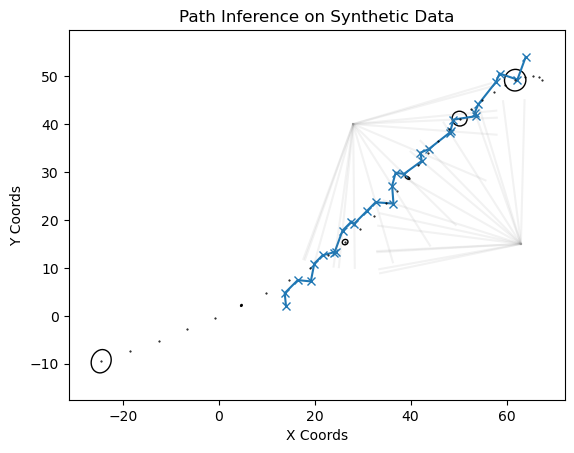

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from BLEanalysis import confidence_ellipse
demo.plot()
ax = plt.gca()
for i,(m,c) in enumerate(zip(mu.numpy(),cov.numpy())):
    std = max(np.sqrt(c[0,0]),np.sqrt(c[1,1]))
    ax.plot(m[0],m[1],'.k',markersize=1)

    if i%5==0:
        el = confidence_ellipse(m[:2],c[:2,:2],ax)
        ax.add_patch(el)
plt.xlabel("X Coords")
plt.ylabel("Y Coords")
plt.title("Path Inference on Synthetic Data")
plt.show()

In [1]:
from BLEanalysis.signals import Signals
sigs = Signals("noamploc2long.log",angleOffset = 38) #TODO Why is this minus here, but + in your code?

2025-04-28 11:48:44.319759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745837324.337028    9239 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745837324.342911    9239 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745837324.355096    9239 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745837324.355118    9239 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745837324.355120    9239 computation_placer.cc:177] computation placer alr

In [2]:
avgRSSIs = sigs.averageRSSIsAtAngle('d')

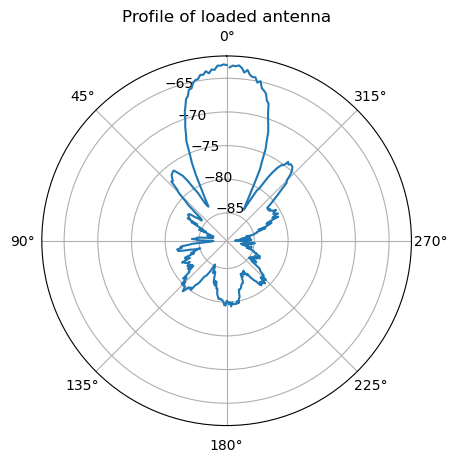

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
plt.plot(avgRSSIs[:, 0], avgRSSIs[:, 1])
plt.title("Profile of loaded antenna");

In [4]:
sigs.data #RSSI, ID(ord of a character id), Angle(radians), Time(milliseconds since transmitter turned on)

array([[-7.80000000e+01,  1.01000000e+02,  4.83456203e+00,
         7.47899000e+05],
       [-8.60000000e+01,  1.02000000e+02,  4.85201532e+00,
         7.47900000e+05],
       [-8.40000000e+01,  1.00000000e+02,  4.86946861e+00,
         7.47685000e+05],
       ...,
       [-8.10000000e+01,  1.00000000e+02,  2.14675498e+00,
         1.48116700e+06],
       [-7.80000000e+01,  1.01000000e+02,  2.14675498e+00,
         1.48149000e+06],
       [-8.10000000e+01,  1.02000000e+02,  2.11184839e+00,
         1.48148200e+06]])

In [5]:
import hashlib
import numpy as np

def getSample(data, time, time_intervals,returnRelativeRSSI=True):        
    """This method is for sampling a whole bunch of times at once, as part of generating the training data.
    Specifically, given a numpy array 'data', containing columns [RSSI, ID, Angle(radians), Time(milliseconds)]
    and the time we want to sample near (time) and the intervals (time_intervals) returns a single instance of this
    #TODO Return None (or raise exception) if missing
    #TODO Allow a list of times to be past, to make this faster    
    
    Parameters:
     - time: the time that we are sampling.
     - time_intervals: separation between samples
    """
    times = np.array(time_intervals) + time
    # find index of the packets in our data set, closest to these times.
          
    index = np.argmin(np.abs(data[:, -1:] - times[None,:]), 0)
    rssis = data[index,0]
    if returnRelativeRSSI:
        rssis-=rssis[0] #NOTE: I've switched to making the first time the angle index time as we could have an unknown number of time_intervals.        
    return rssis, data[index[0],2]


class Angles:
    def __init__(self,data):
        """We use rejection sampling to pick angles that are most likely to have generated the observed signal strengths.
        
        Each time we ask for such a distribution of angles, we might either be using the same spacing of times, or
        we might be using a different spacing. If the latter, we need to build a new training set to sample from.
        
        Parameters:
         data : the raw training data from one of the transmitters that is used to build the rejection tables
                  [RSSI, ID(ord of a character id), Angle(radians), Time(milliseconds since transmitter turned on)]
        """

        #we first need to generate a simulated list of observations... this is how we do it with
        #real empirically collected data, and later sample from it... we could instead skip this
        #step and just call getRSSI later when we want to getSample. TODO Decide if we should rewrite...


        self.data = data

        #this is a dictionary, it is a cache/store of tables of training sets, each with a different set of time_intervals.
        self.training_data = {} 
     

    def buildTable(self,time_intervals):
        """
        We need to build some training data for later rejection sampling.
        """        
        training_data = []
        for sampling in range(10000): #TODO we should use all of them.
            rssis, angle = getSample(self.data,np.random.uniform(self.data[0,-1]+1,self.data[-1,-1]-1), time_intervals=time_intervals)
            training_data.append(np.r_[rssis,angle])
        training_data = np.array(training_data)
        return training_data

    def infer(self,time_intervals,obs,rejection_threshold=4):
        """
        At the time_intervals specified, we have a series of observed signal strengths
        (in 'obs').

        Parameters:
        - time_intervals = the separation of times when we took the samples, e.g. [0, 0.1, 0.2 ,0.3]
        - obs = the signal strengths observed.

        Returns a list of angles that match the rejection sampling.       
        """
        #assert time_intervals[0] == 0, "We assume that the first value in time interval is now at 0."        
        time_intervals-=time_intervals[0]
        hash = hashlib.sha1(time_intervals).hexdigest()
        if hash in self.training_data:
            training_data = self.training_data[hash]
        else:
            training_data = self.buildTable(time_intervals)
            self.training_data[hash] = training_data

        obs = obs - obs[0]
        #matchingrowindices = np.all(np.abs(training_data[:,:-1]-obs)<rejection_threshold,1)
        matchingrowindices = np.mean((training_data[:,:-1]-obs)**2,1)<rejection_threshold
        return training_data[matchingrowindices,-1]

In [6]:
a = Angles(sigs.data)

In [7]:
testsigs = Signals("noamploc1.log")

In [8]:
testdata = testsigs.data[testsigs.data[:,1]==ord('d'),:]

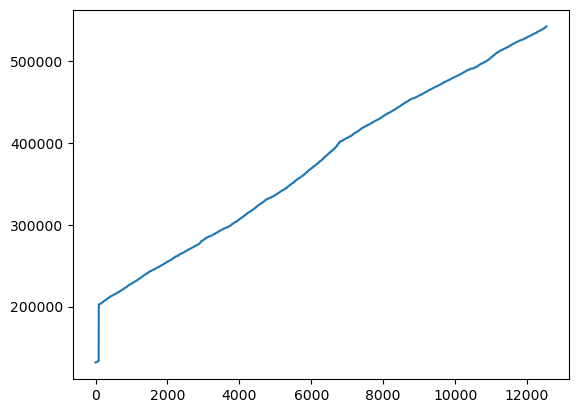

In [9]:
plt.plot(testdata[:,3]) #RSSI, ID(ord of a character id), Angle(radians), Time(milliseconds since transmitter turned on)

In [10]:
time_intervals=np.array([0,40,100,160,200])
testobs, trueangle = getSample(testdata,300000,time_intervals,returnRelativeRSSI=False)

In [11]:
a.infer(time_intervals,testobs)

array([1.65806279, 0.82030475, 1.1693706 , 2.61799388, 1.69296937,
       5.06145483, 3.14159265, 1.46607657, 2.47836754, 2.32128791,
       2.30383461, 4.64257581, 0.82030475, 5.06145483, 1.53588974,
       3.94444411, 2.51327412, 1.71042267, 3.92699082, 0.78539816,
       4.92182849, 3.2637657 , 2.30383461, 2.77507351, 2.61799388,
       3.66519143, 2.04203522, 3.70009801, 3.75245789, 2.47836754,
       2.98451302, 2.44346095, 2.3387412 , 2.51327412, 4.13643033,
       2.75762022, 5.30580093, 5.28834763, 1.97222205, 3.89208423,
       6.24827872, 3.66519143, 4.39822972, 0.78539816, 2.68780705,
       2.02458193, 0.9250245 , 1.6231562 , 2.05948852, 4.64257581,
       2.74016693, 1.50098316, 2.91469985, 1.69296937, 1.37881011,
       2.30383461, 3.92699082, 2.04203522, 2.28638132, 0.78539816,
       3.83972435, 5.55014702, 2.51327412, 6.12610567, 2.91469985,
       1.43116999, 1.85004901, 3.90953752, 3.90953752, 4.48549618,
       3.36848546, 2.61799388, 4.03171057, 2.46091425, 2.72271